In [39]:
import re, nltk, requests
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [43]:
URL = 'https://lrclib.net//api/get'
params = {
    'artist_name': 'Ed Sheeran',
    'track_name': 'Shape of you'
}

In [45]:
resp = requests.get(URL, params=params)
lyr = resp.json().get('plainLyrics', 'Not found')
lyr

'The club isn\'t the best place to find a lover\nSo the bar is where I go (mm-mm)\nMe and my friends at the table doing shots\nDrinking fast, and then we talk slow (mm-mm)\nYou come over and start up a conversation with just me\nAnd trust me, I\'ll give it a chance now (mm-mm)\nTake my hand, stop, put "Van the Man" on the jukebox\nAnd then we start to dance\nAnd now I\'m singing like\n\nGirl, you know I want your love\nYour love was handmade for somebody like me\nCome on now, follow my lead\nI may be crazy, don\'t mind me\nSay, "Boy, let\'s not talk too much\nGrab on my waist and put that body on me"\nCome on now, follow my lead\nCome, come on now, follow my lead\n(Mm-mm)\n\nI\'m in love with the shape of you\nWe push and pull like a magnet do\nAlthough my heart is falling too\nI\'m in love with your body\nLast night you were in my room\nAnd now my bed sheets smell like you\nEvery day discovering something brand new\nOh, I\'m in love with your body\n\nOh I, oh I, oh I, oh I\nOh, I\'m i

In [35]:
nltk.download('stopwords', quiet=True)
english_stopwords = stopwords.words('english')

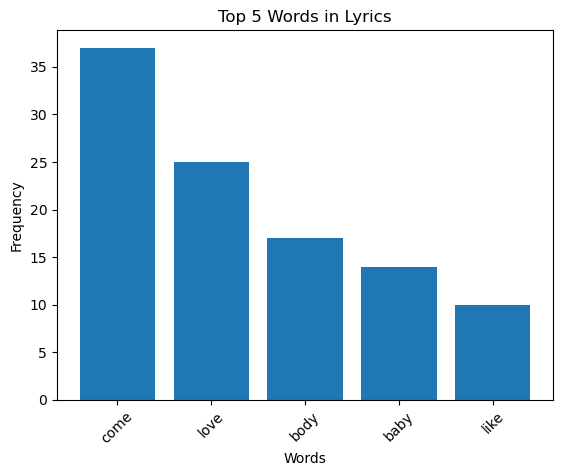

In [37]:
words = re.findall(r'\b[a-z]{3,}\b', lyr.lower())
filtered_words = [word for word in words if word not in english_stopwords]
word_counts = Counter(filtered_words)

top = 5

top_words = word_counts.most_common(top)

words, counts = zip(*top_words)
plt.bar(words, counts)
plt.title(f"Top {top} Words in Lyrics")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()